# Testing Enviornment

In [9]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [10]:
%run ../tests/test_algorithms.py

........
----------------------------------------------------------------------
Ran 8 tests in 0.095s

OK


In [33]:
%run ../tests/test_dataloader.py

........
----------------------------------------------------------------------
Ran 8 tests in 0.025s

OK


In [12]:
%run ../tests/test_predictors.py

.
----------------------------------------------------------------------
Ran 1 test in 0.032s

OK


## Running example of the system

In [13]:
%run ../tools/algorithms.py

In [34]:
%run ../tools/dataloader.py

In [15]:
test = DataLoader('aapl', '2010-02-01', '2015-02-10')

In [16]:
prices = test.get_close()

In [17]:
prices = np.array(prices)
len(prices)

1266

In [18]:
prices

array([[ 6.95464277],
       [ 6.99499989],
       [ 7.11535692],
       ...,
       [29.73250008],
       [29.93000031],
       [30.50499916]])

In [22]:
%run ../tools/predictors.py

In [23]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)

In [24]:
op0.create_bilstm()

In [25]:
op0.model_blueprint()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 25, 100)           20800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 7)                 357       
Total params: 51,357
Trainable params: 51,357
Non-trainable params: 0
_________________________________________________________________


In [26]:
op0.fit_model(10)

Epoch 1/10
99/99 [==============================] - 2s 25ms/step - loss: 40.7307 - mean_squared_error: 40.7307 - val_loss: 6.2170 - val_mean_squared_error: 6.2170
Epoch 2/10
99/99 [==============================] - 2s 19ms/step - loss: 1.3662 - mean_squared_error: 1.3662 - val_loss: 9.7171 - val_mean_squared_error: 9.7171
Epoch 3/10
99/99 [==============================] - 2s 19ms/step - loss: 0.9328 - mean_squared_error: 0.9328 - val_loss: 5.0945 - val_mean_squared_error: 5.0945
Epoch 4/10
99/99 [==============================] - 2s 19ms/step - loss: 0.9592 - mean_squared_error: 0.9592 - val_loss: 3.8003 - val_mean_squared_error: 3.8003
Epoch 5/10
99/99 [==============================] - 2s 17ms/step - loss: 0.7549 - mean_squared_error: 0.7549 - val_loss: 2.4231 - val_mean_squared_error: 2.4231
Epoch 6/10
99/99 [==============================] - 1s 15ms/step - loss: 0.6339 - mean_squared_error: 0.6339 - val_loss: 3.1545 - val_mean_squared_error: 3.1545
Epoch 7/10
99/99 [==============

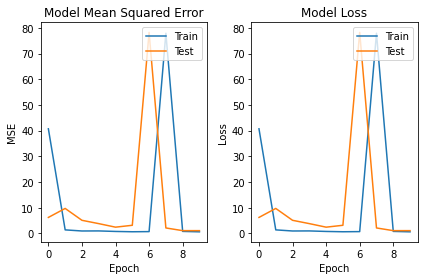

In [27]:
op0.show_performance()

In [28]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [29]:
nice = op0.predict(oyea)
nice

array([[31.378336, 29.44823 , 30.645372, 30.230118, 30.300209, 28.971325,
        29.968016]], dtype=float32)

In [18]:
op1.create_lstm()

In [19]:
op1.model_blueprint()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 25, 40)            6720      
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 50)            18200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 45,477
Trainable params: 45,477
Non-trainable params: 0
_________________________________________________________________


In [20]:
op1.fit_model(10)

Epoch 1/10
99/99 [==============================] - 3s 25ms/step - loss: 39.0946 - mean_squared_error: 39.0946 - val_loss: 10.3914 - val_mean_squared_error: 10.3914
Epoch 2/10
99/99 [==============================] - 2s 22ms/step - loss: 1.3967 - mean_squared_error: 1.3967 - val_loss: 7.2500 - val_mean_squared_error: 7.2500
Epoch 3/10
99/99 [==============================] - 2s 23ms/step - loss: 1.2796 - mean_squared_error: 1.2796 - val_loss: 3.9700 - val_mean_squared_error: 3.9700
Epoch 4/10
99/99 [==============================] - 2s 23ms/step - loss: 0.7427 - mean_squared_error: 0.7427 - val_loss: 1.9502 - val_mean_squared_error: 1.9502
Epoch 5/10
99/99 [==============================] - 2s 23ms/step - loss: 0.8330 - mean_squared_error: 0.8330 - val_loss: 3.0684 - val_mean_squared_error: 3.0684
Epoch 6/10
99/99 [==============================] - 2s 22ms/step - loss: 0.7064 - mean_squared_error: 0.7064 - val_loss: 5.0436 - val_mean_squared_error: 5.0436
Epoch 7/10
99/99 [============

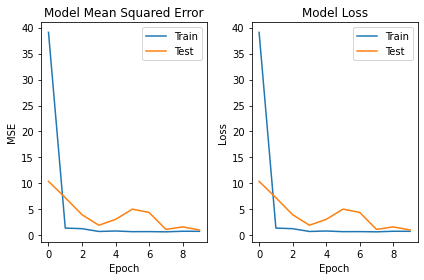

In [21]:
op1.show_performance()

In [33]:
nice = op1.predict(oyea)
nice

array([[28.821764, 27.561462, 28.699505, 30.082558, 29.114218, 27.839628,
        27.334814]], dtype=float32)

In [22]:
op2.create_cnn()

In [23]:
op2.model_blueprint()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 64)            192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 23, 32)            4128      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 352)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                17650     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 357       
Total params: 22,327
Trainable params: 22,327
Non-trainable params: 0
__________________________________________________

In [24]:
op2.fit_model(10)

Epoch 1/10
99/99 [==============================] - 0s 4ms/step - loss: 27.7155 - mean_squared_error: 27.7155 - val_loss: 1.7201 - val_mean_squared_error: 1.7201
Epoch 2/10
99/99 [==============================] - 0s 3ms/step - loss: 1.0415 - mean_squared_error: 1.0415 - val_loss: 1.0469 - val_mean_squared_error: 1.0469
Epoch 3/10
99/99 [==============================] - 0s 3ms/step - loss: 1.0011 - mean_squared_error: 1.0011 - val_loss: 1.0743 - val_mean_squared_error: 1.0743
Epoch 4/10
99/99 [==============================] - 0s 3ms/step - loss: 0.9491 - mean_squared_error: 0.9491 - val_loss: 1.2240 - val_mean_squared_error: 1.2240
Epoch 5/10
99/99 [==============================] - 0s 3ms/step - loss: 1.0053 - mean_squared_error: 1.0053 - val_loss: 1.2476 - val_mean_squared_error: 1.2476
Epoch 6/10
99/99 [==============================] - 0s 3ms/step - loss: 0.9139 - mean_squared_error: 0.9139 - val_loss: 1.5703 - val_mean_squared_error: 1.5703
Epoch 7/10
99/99 [====================

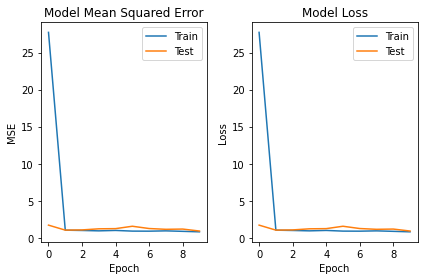

In [25]:
op2.show_performance()

In [34]:
nice = op2.predict(oyea)
nice

array([[28.479273, 29.085808, 29.253847, 28.770725, 29.38114 , 28.58591 ,
        30.053885]], dtype=float32)